In [1]:
import sys
sys.path

['C:\\work2023',
 'C:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip',
 'C:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\Lib',
 'C:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\DLLs',
 '',
 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32',
 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib',
 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin',
 'C:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311',
 'C:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages']

In [2]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
X = load_wine()['data']
y = load_wine()['target']

In [38]:
## one hot 작성함수
def make_onehot(x):
    col = np.unique(x).size
    row = len(x) ## x.shape[0]
    onehot = np.zeros((row,col))
    for idx, val in enumerate(x):
        onehot[idx,val] = 1
    return onehot

## softmax 
def softmax(x):
    m = np.max(x)
    x -= m
    return np.exp(x)/np.sum(np.exp(x))

def sigmoid(x):
    return x/(1+np.exp(-x))



class Leejunyoung:
    def __init__(self,x,y):
        self.x = x
        self.y_original = y
        self.y = make_onehot(y)
        # self.w = np.random.randn(self.x.shape[1],self.y.shape[1])
        self.w=np.random.uniform(0,1,size=(self.x.shape[1], self.y.shape[1]))
        self.b = np.zeros(self.y.shape[1])
        
    def fit(self,epochs,lr):
        for epoch in range(epochs):
            self.w -= self.diff()[0]*lr
            self.b -= self.diff()[1]*lr
            if epoch % 100 == 0:
                print(f'Loss : ==================> {self.cost()}')
    
    def predict(self):
        self.y_hat = np.dot(self.x,self.w) + self.b
        self.y_hat = np.apply_along_axis(softmax,1,self.y_hat)
        return self.y_hat
    
    def cost(self):
        self.predict()
        epsilon = 1e-7
        return -np.sum(self.y*np.log(self.y_hat+epsilon))
    
    def diff(self):
        h = 1e-4
        self.grad_a = np.zeros_like(self.w)
        for i in range(self.w.shape[0]):
            for j in range(self.w.shape[1]):
                tmp = self.w[i,j]
                fx = self.cost()
                self.w[i,j] += h
                fxh = self.cost()
                self.grad_a[i,j] = (fxh-fx)/h
                self.w[i,j] = tmp
        self.grad_b = np.zeros_like(self.b)
        for i in range(self.b.shape[0]):
            tmp = self.b[i]
            fx = self.cost()
            self.b[i] += h
            fxh = self.cost()
            self.grad_b[i] = (fxh-fx)/h
            self.b[i] = tmp
        return self.grad_a, self.grad_b
    
    def score(self,x,y):
        predict = np.argmax(softmax(np.dot(x,self.w)+self.b),1)
        score = np.sum(predict == y)/len(x)
        return score 
                

In [4]:
from sklearn.datasets import load_iris, load_wine
# X = load_iris()['data']
# y = load_iris()['target']
X = load_wine()['data']
y = load_wine()['target']

In [5]:
model = Leejunyoung(X,y)

In [6]:
model.fit(epochs=10000, lr=1e-4)

C:\Users\admin\AppData\Local\Temp\ipykernel_25084\2424954009.py:43: RuntimeWarning: divide by zero encountered in log
  return -np.sum(self.y*np.log(self.y_hat))
C:\Users\admin\AppData\Local\Temp\ipykernel_25084\2424954009.py:43: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(self.y*np.log(self.y_hat))


Loss : ==================> nan
Loss : ==================> nan


KeyboardInterrupt: 

In [7]:
np.sum(np.argmax(softmax(np.dot(model.x, self.w)+self.b), 1), y)/len(y)

NameError: name 'self' is not defined

In [ ]:
# 대표적 스케일링
# img/255 <-픽셀 범위가 255

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [9]:
nm = MinMaxScaler()
x=np.array([1,2,3]).reshape(-1, 1)
nm.fit_transform(x) #scale 된 값이 변환까지 돼서 나옴

array([[0. ],
       [0.5],
       [1. ]])

In [10]:
ss = StandardScaler()
x=np.array([1,2,3]).reshape(-1, 1)
ss.fit(x)
ss.transform(x)

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [11]:
rs=RobustScaler()
x=np.array([1,2,3]).reshape(-1, 1)
rs.fit(x)
rs.transform(x)

array([[-1.],
       [ 0.],
       [ 1.]])

In [12]:
np.mean(x)

2.0

In [13]:
np.std(x)

0.816496580927726

In [14]:
np.median(x)

2.0

In [15]:
x = np.arange(1, 100)
np.percentile(x,75)

74.5

In [16]:
np.percentile(x, 25)

25.5

In [17]:
pd.Series(x).describe()

count    99.000000
mean     50.000000
std      28.722813
min       1.000000
25%      25.500000
50%      50.000000
75%      74.500000
max      99.000000
dtype: float64

In [18]:
import matplotlib.pyplot as plt

In [19]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

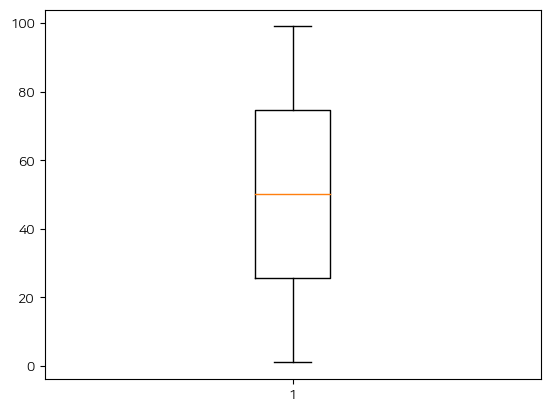

In [20]:
plt.boxplot(x)
plt.show()

In [21]:
#scaler
def min_max(x):
    return (x-min(x))/(np.max(x)-np.min(x)) #분모: 범위(range)
def standard(x):
    return (x-np.mean(x))/np.std(x) #std(x) == np.sqrt(np.mean((x-np.mean(x))**2))
def robust(x):
    q3=np.percentile(x,75)
    q1=np.percentile(x,25)
    return (x-np.median(x))/(q3-q1)

In [22]:
np.sum(X,0)

array([2.31411000e+03, 4.15870000e+02, 4.21240000e+02, 3.47010000e+03,
       1.77540000e+04, 4.08530000e+02, 3.61210000e+02, 6.44100000e+01,
       2.83180000e+02, 9.00339999e+02, 1.70426000e+02, 4.64880000e+02,
       1.32947000e+05])

In [23]:
X=np.apply_along_axis(min_max, 1, X)

In [24]:
model=Leejunyoung(X,y)

In [29]:
model.predict()

array([[0.22747973, 0.46855937, 0.3039609 ],
       [0.22633824, 0.46570958, 0.30795218],
       [0.22872459, 0.46529798, 0.30597743],
       [0.22805334, 0.46320379, 0.30874287],
       [0.2287451 , 0.47728745, 0.29396745],
       [0.22763818, 0.46327192, 0.3090899 ],
       [0.2272459 , 0.46324782, 0.30950628],
       [0.22753693, 0.46586191, 0.30660116],
       [0.22686592, 0.46613844, 0.30699564],
       [0.22791261, 0.46590204, 0.30618534],
       [0.22822881, 0.46262422, 0.30914697],
       [0.22771236, 0.46354191, 0.30874573],
       [0.22779106, 0.46260673, 0.30960221],
       [0.22679083, 0.46376041, 0.30944876],
       [0.22735677, 0.46144397, 0.31119926],
       [0.22782692, 0.46485004, 0.30732304],
       [0.22835768, 0.46628757, 0.30535475],
       [0.22864065, 0.46743305, 0.3039263 ],
       [0.22799522, 0.46149826, 0.31050652],
       [0.22637373, 0.47338282, 0.30024344],
       [0.22739198, 0.47468337, 0.29792466],
       [0.22750055, 0.47449167, 0.29800777],
       [0.

In [30]:
y_hat=model.predict()

In [25]:
model.fit(epochs=100, lr=1e-4)

Loss : ==================> 213.63301204154976


KeyboardInterrupt: 

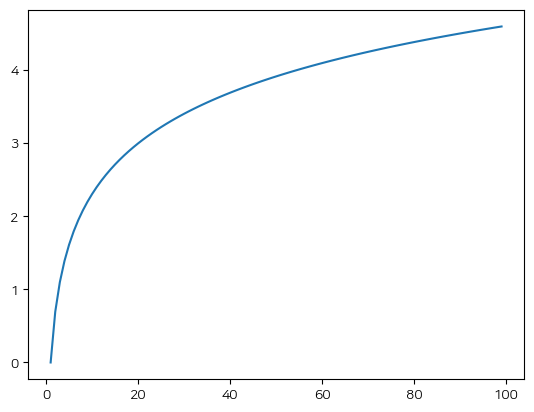

In [26]:
np.linspace(-3,3,100)
y=np.log(x)
plt.plot(x,y)
plt.show()

In [31]:
softmax(y_hat)

array([[0.00167499, 0.00213162, 0.00180812],
       [0.00167307, 0.00212556, 0.00181535],
       [0.00167707, 0.00212468, 0.00181177],
       [0.00167595, 0.00212024, 0.00181678],
       [0.00167711, 0.00215031, 0.00179014],
       [0.00167525, 0.00212038, 0.00181741],
       [0.00167459, 0.00212033, 0.00181817],
       [0.00167508, 0.00212588, 0.0018129 ],
       [0.00167396, 0.00212647, 0.00181361],
       [0.00167571, 0.00212597, 0.00181214],
       [0.00167624, 0.00211901, 0.00181752],
       [0.00167538, 0.00212096, 0.00181679],
       [0.00167551, 0.00211897, 0.00181835],
       [0.00167383, 0.00212142, 0.00181807],
       [0.00167478, 0.00211651, 0.00182125],
       [0.00167557, 0.00212373, 0.00181421],
       [0.00167646, 0.00212679, 0.00181064],
       [0.00167693, 0.00212922, 0.00180805],
       [0.00167585, 0.00211663, 0.00181999],
       [0.00167313, 0.00214193, 0.00180141],
       [0.00167484, 0.00214472, 0.00179723],
       [0.00167502, 0.00214431, 0.00179738],
       [0.

In [32]:
model.y_hat

array([[-0.27632252, -0.03524288, -0.19984135],
       [-0.27746401, -0.03809267, -0.19585007],
       [-0.27507766, -0.03850427, -0.19782482],
       [-0.27574891, -0.04059846, -0.19505938],
       [-0.27505715, -0.0265148 , -0.2098348 ],
       [-0.27616407, -0.04053033, -0.19471235],
       [-0.27655635, -0.04055443, -0.19429597],
       [-0.27626532, -0.03794034, -0.19720109],
       [-0.27693633, -0.03766381, -0.19680661],
       [-0.27588964, -0.03790021, -0.19761691],
       [-0.27557344, -0.04117803, -0.19465528],
       [-0.27608989, -0.04026034, -0.19505652],
       [-0.27601119, -0.04119552, -0.19420004],
       [-0.27701142, -0.04004184, -0.19435349],
       [-0.27644548, -0.04235828, -0.19260299],
       [-0.27597533, -0.03895221, -0.19647921],
       [-0.27544457, -0.03751468, -0.1984475 ],
       [-0.2751616 , -0.0363692 , -0.19987595],
       [-0.27580703, -0.04230399, -0.19329573],
       [-0.27742851, -0.03041943, -0.20355881],
       [-0.27641027, -0.02911888, -0.205

In [36]:
-np.sum(model.y*np.log(model.y_hat))

193.88348298977428

In [ ]:
model.y*np.log(model.y_hat)

In [37]:
np.random.uniform(0,1,size=(13,3)) #uniform 균등분포

array([[0.59968848, 0.18658556, 0.19069812],
       [0.2718037 , 0.6940133 , 0.28028587],
       [0.36097783, 0.49225227, 0.67698817],
       [0.23719545, 0.96111105, 0.69433229],
       [0.12156006, 0.20995552, 0.13951507],
       [0.1419431 , 0.87646365, 0.1429674 ],
       [0.85769224, 0.03631299, 0.43396788],
       [0.57245005, 0.47273668, 0.34594478],
       [0.40037355, 0.41256471, 0.42677785],
       [0.73504947, 0.21623762, 0.38152743],
       [0.61841769, 0.50842075, 0.89549538],
       [0.14497516, 0.18450661, 0.94556462],
       [0.8566066 , 0.80746102, 0.52452465]])

In [39]:
model.score(X, y)

C:\Users\admin\AppData\Local\Temp\ipykernel_25084\2424954009.py:68: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  score = np.sum(predict == y)/len(x)


0.0

In [40]:
import pickle

In [41]:
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

PicklingError: Can't pickle <class '__main__.Leejunyoung'>: it's not the same object as __main__.Leejunyoung